In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv(r'C:\Users\mandi\OneDrive\Desktop\Health_Sleep_Statistics.csv')

data.head()
Frist five rows

In [4]:
data.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [5]:
data.tail()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
95,96,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,97,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,98,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,99,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no
99,100,41,m,6,00:30,07:00,5000,2200,medium,unhealthy,no,no


In [6]:
# Assuming 'data' is your DataFrame
rows, columns = data.shape

print(f"Total Rows: {rows}")
print(f"Total Columns: {columns}")


Total Rows: 100
Total Columns: 12


In [7]:
# Check data types, non-null counts, etc.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


Overall Description
The dataset is clean, with no missing values, and it includes both numerical and categorical data types. This structure enables a range of analyses, such as understanding correlations between sleep quality, physical activity, and dietary habits. Additionally, having categorical data types (object) and numeric types (int64) makes this dataset versatile for statistical analysis, classification, or clustering methods.
The clean dataset with both numeric and categorical data types is ideal for diverse analyses, such as examining relationships between sleep quality, physical activity, and dietary habits.

In [8]:
# Summary statistics for numerical columns
data.describe()


,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


most users have good sleep quality, moderate daily steps, and calorie burn, with some variance among individual data points.
Overall, Daily Steps has high variability, Calories Burned shows consistency, and Sleep Quality is tightly grouped around the mean.
 Comparing these gives a holistic view of users, indicating a generally active and healthy profile with moderate variance in physical activity levels.

In [9]:
# Remove a column and update the DataFrame in-place
data.drop(columns=['User ID'], inplace=True)


In [10]:
data.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [11]:
# Check for missing values
data.isnull().sum()


Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

 Age and sleep Quality 

In [12]:
age_sleep_quality_corr = data [['Age', 'Sleep Quality']].corr()
age_sleep_quality_corr 



,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


The correlation matrix indicates a strong relationship between Age and Sleep Quality. The diagonal values of 1.000000 signify perfect correlations, as each variable is perfectly correlated with itself. The off-diagonal value, -0.848356, reveals a strong negative correlation between Age and Sleep Quality. This suggests that as Age increases, Sleep Quality tends to decrease significantly, and vice versa. The negative correlation highlights an inverse relationship between these variables, meaning older individuals in the dataset are likely to experience lower sleep quality compared to younger individuals. This finding underscores the potential impact of aging on sleep quality.

In [13]:
age_sleep_quality_corr ['Age']


Age              1.000000
Sleep Quality   -0.848356
Name: Age, dtype: float64

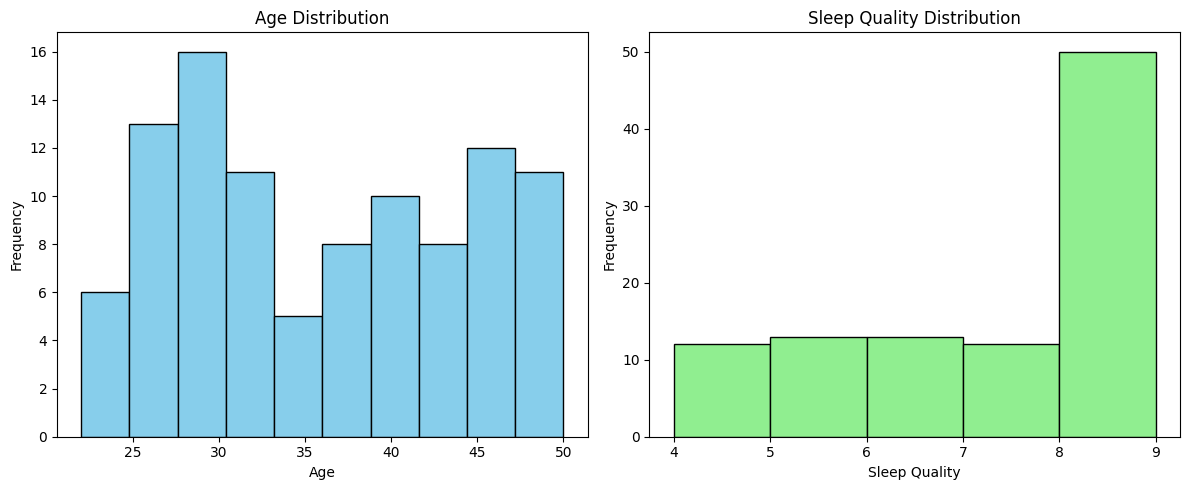

In [14]:


# Histogram for Age
plt.figure(figsize=(12, 5))

# Age Histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Sleep Quality Histogram
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.hist(data['Sleep Quality'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Sleep Quality Distribution')
plt.xlabel('Sleep Quality')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


The Age histogram shows a spread across different age groups, with certain age ranges more represented. The Sleep Quality histogram reveals most users rate sleep quality around similar values, indicating consistency in their sleep experiences. Peaks in both histograms suggest common trends, offering a quick view of user demographics and typical sleep ratings.

In [15]:
%pip install scikit-learn



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# Load data (replace with your actual file path)

# Define features and target variable
X = data[['Age']]  # Independent variable
y = data['Sleep Quality']  # Dependent variable


Predict and Evaluate the Model
Calculate the model’s performance metrics, such as R-squared and Mean Squared Error (MSE).

For linnerRegression 

In [17]:
age_sleep_quality_model = LinearRegression()

X = data[["Age"]]
y = data ['Sleep Quality']
age_sleep_quality_model.fit(X,y)

LinearRegression()

In [18]:
age_sleep_quality_model.intercept_

np.float64(13.268812023190646)

In [19]:
age_sleep_quality_model.coef_

array([-0.17408531])

In [20]:
age_sleep_quality_predication = age_sleep_quality_model.predict(X)

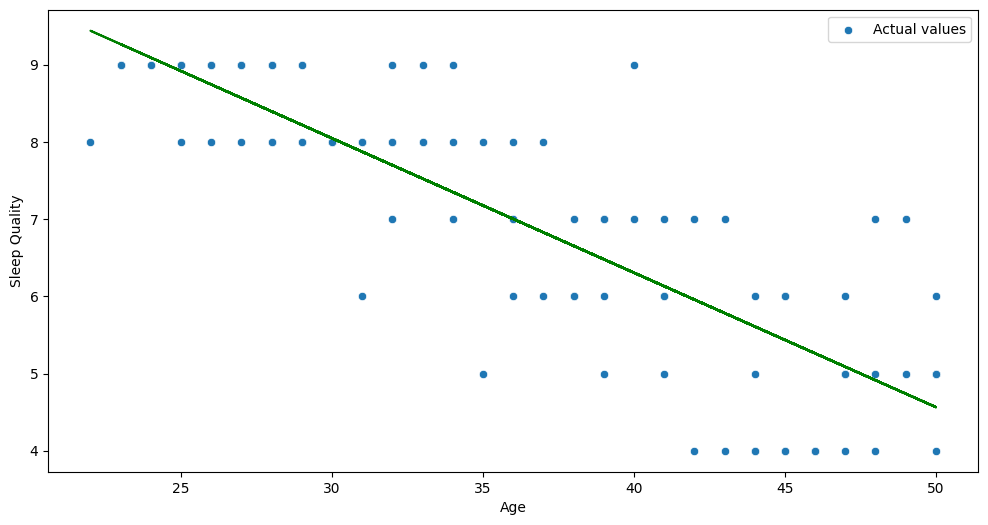

In [21]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'Age', y = 'Sleep Quality', data = data, label = 'Actual values')
plt.plot(X, age_sleep_quality_predication, color = 'green')
plt.show()

 Physical Activity VS Sleep Quality 

In [22]:
data ['Physical Activity Level']. head()

0    medium
1       low
2      high
3       low
4      high
Name: Physical Activity Level, dtype: object

In [23]:
data  ['Sleep Quality']. head()

0    8
1    7
2    9
3    5
4    8
Name: Sleep Quality, dtype: int64

In [24]:
data ['Gender'].head()

0    f
1    m
2    f
3    m
4    f
Name: Gender, dtype: object

Bargraphs 

<Axes: xlabel='Gender', ylabel='Sleep Quality'>

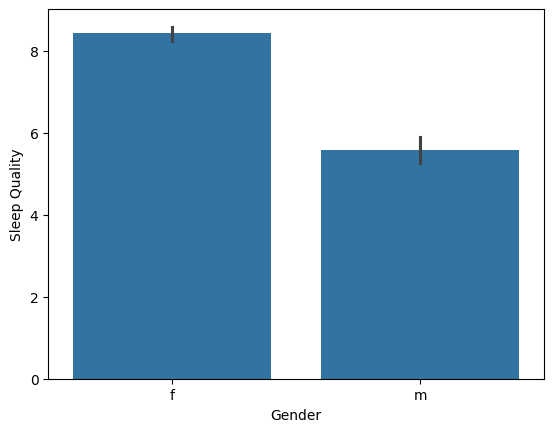

In [25]:
sns.barplot(x ='Gender', y = 'Sleep Quality', data= data)

Figure shows that Female has more Sleep Quality rather than Male.

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

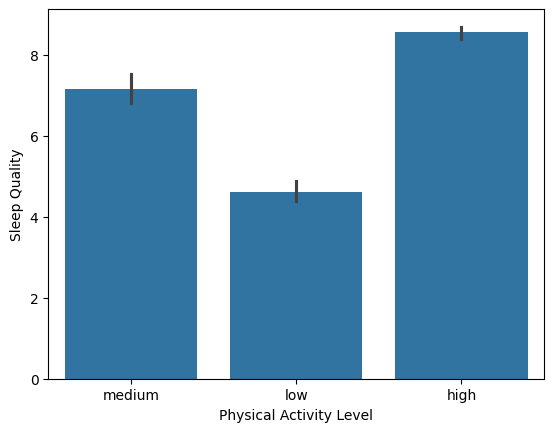

In [26]:
sns.barplot(x='Physical Activity Level', y= 'Sleep Quality', data= data)

The person who have high physical Activity they have high sleep Quality. The person who have less or low physical Activity they have low sleep Quality.

Time Of sleep Quality and Waking up sleep Quality


In [27]:
data['Bedtime'].head()

0    23:00
1    00:30
2    22:45
3    01:00
4    23:30
Name: Bedtime, dtype: object

In [28]:
data ['Wake-up Time'].head()

0    06:30
1    07:00
2    06:45
3    06:30
4    07:00
Name: Wake-up Time, dtype: object

Those are String value i am going to convert string to Number to finfd actual hour 

In [29]:
def Sleep_time_helper_function(str_time):
    try:
        h, m = str_time.split(":")  # Split the string into hours and minutes
        return int(h) + int(m) / 60  # Convert to hours as a float
    except Exception as e:
        print(f"Error processing time '{str_time}': {e}")
        return None  # Return None if there's an error

# Apply the function to the relevant columns
data['Bedtime'] = data['Bedtime'].apply(Sleep_time_helper_function)
data['Wake-up Time'] = data['Wake-up Time'].apply(Sleep_time_helper_function)


In [30]:
print(data['Bedtime'].head())



0    23.00
1     0.50
2    22.75
3     1.00
4    23.50
Name: Bedtime, dtype: float64


In [31]:

print(data['Wake-up Time'].head())


0    6.50
1    7.00
2    6.75
3    6.50
4    7.00
Name: Wake-up Time, dtype: float64


Creating new column name Sleep Duration Hour 

In [32]:
data['Sleep Duration Hour'] = (data['Wake-up Time'] - data['Bedtime']) % 24
print(data['Sleep Duration Hour'].head())

0    7.5
1    6.5
2    8.0
3    5.5
4    7.5
Name: Sleep Duration Hour, dtype: float64


After create new  column 'Sleep duration hour' complate data set 

In [33]:
data.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hour
0,25,f,8,23.00,6.50,8000,2500,medium,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,low,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,high,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,low,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,high,medium,no,no,7.5


Some Graphs Presentation 

Sleep Duration Hour VS Sleep Quality

<Axes: xlabel='Sleep Duration Hour', ylabel='Sleep Quality'>

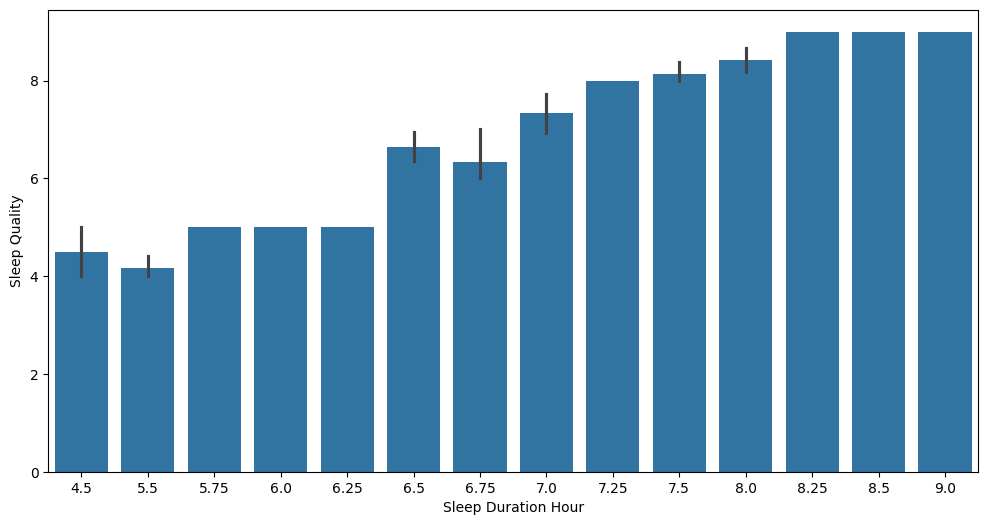

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Sleep Duration Hour', y= 'Sleep Quality', data = data)

IN this figure shows more sleeping hours has more sleep quality.

Bedtime VS Sleep Quality

<Axes: xlabel='Bedtime', ylabel='Sleep Quality'>

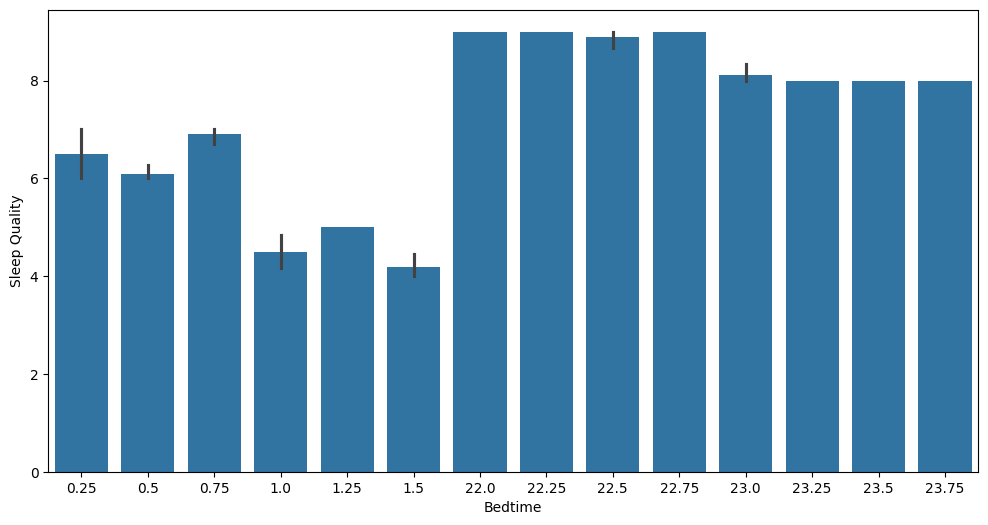

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Bedtime', y= 'Sleep Quality', data = data)

Wake up time VS Sleep Quality

<Axes: xlabel='Wake-up Time', ylabel='Sleep Quality'>

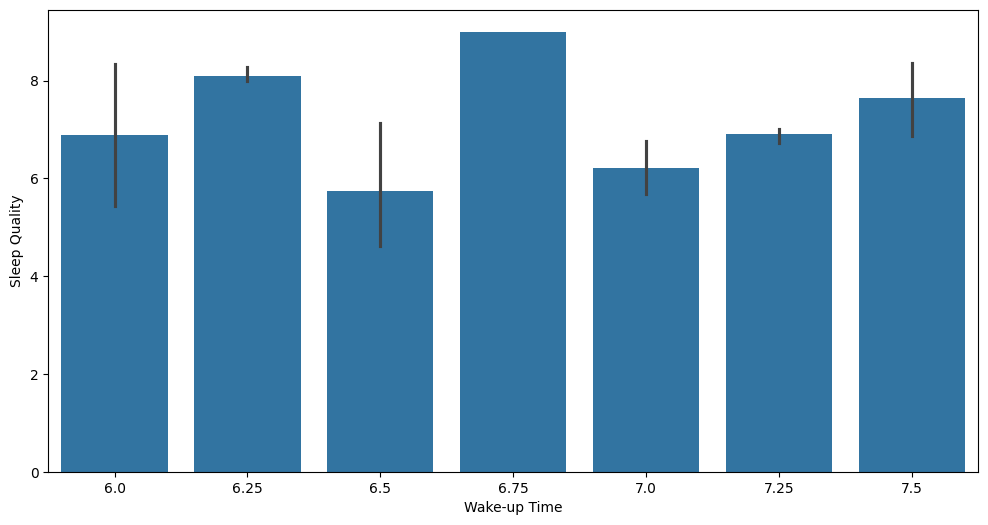

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Wake-up Time', y= 'Sleep Quality', data = data)

The persons whose Wake-up Time is between 6.5 to 7.0 , they have good Sleep quality .

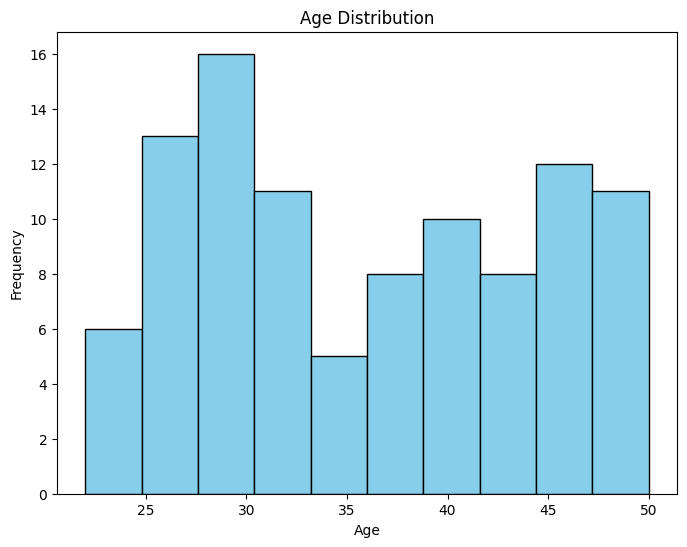

In [37]:
# Histogram for Age
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


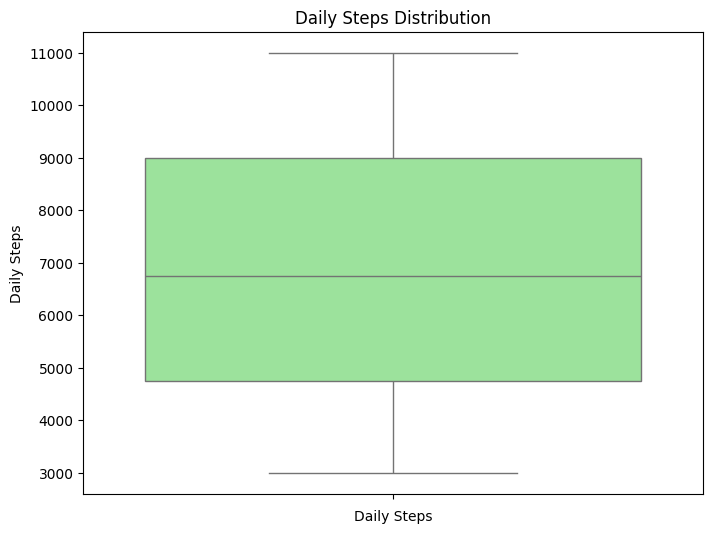

In [38]:
# Box plot for Daily Steps
plt.figure(figsize=(8, 6))
sns.boxplot(data['Daily Steps'], color='lightgreen')
plt.title('Daily Steps Distribution')
plt.xlabel('Daily Steps')
plt.show()


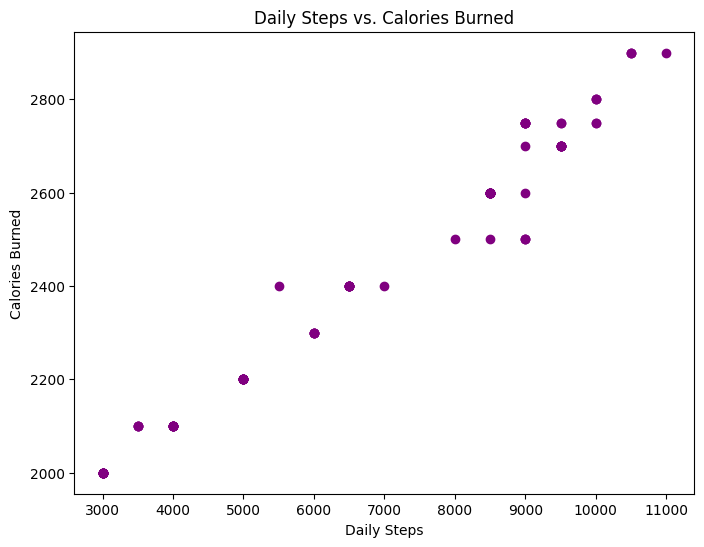

In [39]:
# Scatter plot for Daily Steps vs. Calories Burned
plt.figure(figsize=(8, 6))
plt.scatter(data['Daily Steps'], data['Calories Burned'], color='purple')
plt.title('Daily Steps vs. Calories Burned')
plt.xlabel('Daily Steps')
plt.ylabel('Calories Burned')
plt.show()


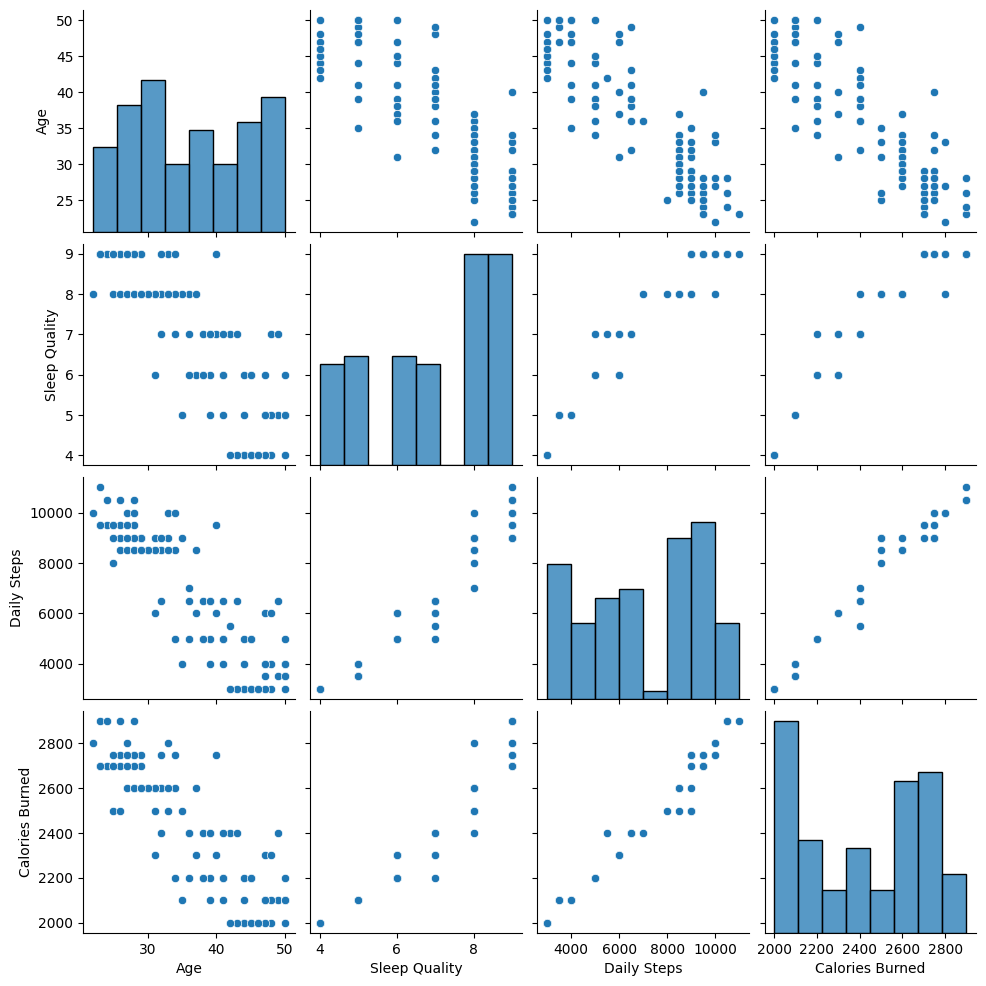

In [40]:
# Pair plot for multiple numerical columns
sns.pairplot(data[['Age', 'Sleep Quality', 'Daily Steps', 'Calories Burned']])
plt.show()


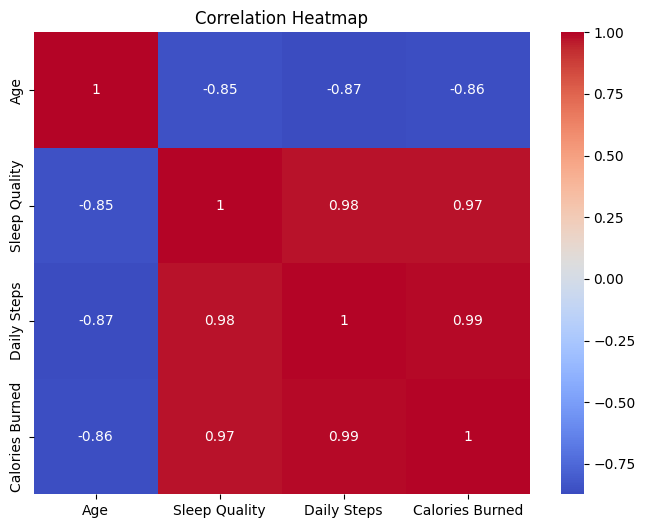

In [41]:
# Heatmap for correlation between numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Age', 'Sleep Quality', 'Daily Steps', 'Calories Burned']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


 Adding new dataset


In [42]:
Df = pd.read_csv(r'C:\Users\mandi\OneDrive\Desktop\Sleep_health_Lifestayal.csv')

In [43]:
Df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Gender column from both data set 

In [44]:
Df['Gender'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [45]:
data ['Gender'].head()

0    f
1    m
2    f
3    m
4    f
Name: Gender, dtype: object

Marge both data set using Gender column
# Set Gender and Age as the index for both DataFrames

In [46]:
print(data.columns)
print(Df.columns)


Index(['Age', 'Gender', 'Sleep Quality', 'Bedtime', 'Wake-up Time',
       'Daily Steps', 'Calories Burned', 'Physical Activity Level',
       'Dietary Habits', 'Sleep Disorders', 'Medication Usage',
       'Sleep Duration Hour'],
      dtype='object')
Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [47]:
# Check if columns were dropped
print(data.info())
print(Df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      100 non-null    int64  
 1   Gender                   100 non-null    object 
 2   Sleep Quality            100 non-null    int64  
 3   Bedtime                  100 non-null    float64
 4   Wake-up Time             100 non-null    float64
 5   Daily Steps              100 non-null    int64  
 6   Calories Burned          100 non-null    int64  
 7   Physical Activity Level  100 non-null    object 
 8   Dietary Habits           100 non-null    object 
 9   Sleep Disorders          100 non-null    object 
 10  Medication Usage         100 non-null    object 
 11  Sleep Duration Hour      100 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 9.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
D

 Reset Index for Both DataFrames
 Convert the Gender and Age indices back to regular columns in both data and Df:

In [48]:
data.reset_index(inplace=True)
Df.reset_index(inplace=True)


In [49]:
print(data.columns)
print(Df.columns)


Index(['index', 'Age', 'Gender', 'Sleep Quality', 'Bedtime', 'Wake-up Time',
       'Daily Steps', 'Calories Burned', 'Physical Activity Level',
       'Dietary Habits', 'Sleep Disorders', 'Medication Usage',
       'Sleep Duration Hour'],
      dtype='object')
Index(['index', 'Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [50]:
data.set_index(['Gender', 'Age'], inplace=True)
Df.set_index(['Gender', 'Age'], inplace=True)


Merge using innerjoin 

In [51]:
# Perform the join (inner join on 'Gender' and 'Age')
merged_data = data.join(Df, how='inner', lsuffix='_data', rsuffix='_Df')

#  reset the index to make 'Gender' and 'Age' columns again
merged_data.reset_index(inplace=True)

# Show the resulting merged data
print(merged_data)

Empty DataFrame
Columns: [Gender, Age, index_data, Sleep Quality, Bedtime, Wake-up Time, Daily Steps_data, Calories Burned, Physical Activity Level_data, Dietary Habits, Sleep Disorders, Medication Usage, Sleep Duration Hour, index_Df, Person ID, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level_Df, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps_Df, Sleep Disorder]
Index: []

[0 rows x 25 columns]


Using outerjoin 

In [52]:
# Perform an outer join
merged_data = data.join(Df, how='outer', lsuffix='_data', rsuffix='_Df')

#  reset the index to make 'Gender' and 'Age' columns again
merged_data.reset_index(inplace=True)

# Show the resulting merged data
print(merged_data)

     Gender  Age  index_data  Sleep Quality  Bedtime  Wake-up Time  \
0    Female   29         NaN            NaN      NaN           NaN   
1    Female   29         NaN            NaN      NaN           NaN   
2    Female   30         NaN            NaN      NaN           NaN   
3    Female   30         NaN            NaN      NaN           NaN   
4    Female   31         NaN            NaN      NaN           NaN   
..      ...  ...         ...            ...      ...           ...   
468       m   50        37.0            5.0     1.50           6.0   
469       m   50        59.0            6.0     0.50           7.0   
470       m   50        73.0            4.0     1.50           7.0   
471       m   50        85.0            5.0     1.25           7.0   
472       m   50        93.0            5.0     1.25           7.0   

     Daily Steps_data  Calories Burned Physical Activity Level_data  \
0                 NaN              NaN                          NaN   
1                

In [53]:
# Check Gender and Age in the index
print(merged_data.index)


RangeIndex(start=0, stop=473, step=1)


In [54]:
# Reset index to make 'Gender' and 'Age' columns
merged_data.reset_index(inplace=True)

# Now We can access 'Gender' and 'Age' as regular columns
print(merged_data[['Gender', 'Age']])


     Gender  Age
0    Female   29
1    Female   29
2    Female   30
3    Female   30
4    Female   31
..      ...  ...
468       m   50
469       m   50
470       m   50
471       m   50
472       m   50

[473 rows x 2 columns]


In [55]:
# Reset the index to move 'Gender' back to a regular column
data.reset_index(inplace=True)

# Now replace 'Female' with 'f' and 'Male' with 'm'
data['Gender'] = data['Gender'].replace({'Female': 'f', 'Male': 'm'})

# Show the updated DataFrame
print(data)


   Gender  Age  index  Sleep Quality  Bedtime  Wake-up Time  Daily Steps  \
0       f   25      0              8    23.00          6.50         8000   
1       m   34      1              7     0.50          7.00         5000   
2       f   29      2              9    22.75          6.75         9000   
3       m   41      3              5     1.00          6.50         4000   
4       f   22      4              8    23.50          7.00        10000   
..    ...  ...    ...            ...      ...           ...          ...   
95      m   43     95              7     0.75          7.25         6500   
96      f   33     96              8    23.25          6.25         8500   
97      m   46     97              4     1.50          7.00         3000   
98      f   25     98              9    22.25          6.75         9500   
99      m   41     99              6     0.50          7.00         5000   

    Calories Burned Physical Activity Level Dietary Habits Sleep Disorders  \
0        

C:\Users\mandi\AppData\Local\Temp\ipykernel_16360\2231096112.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='Set1')


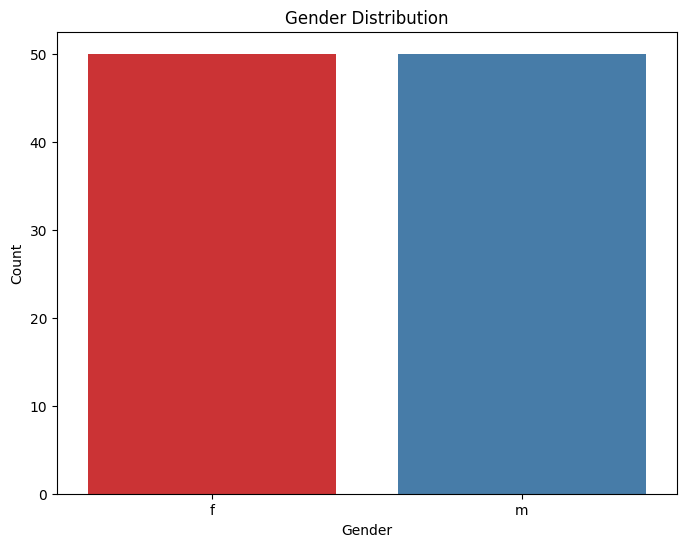

In [57]:
# Create a bar plot to show the count of 'f' and 'm' in 'Gender'
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Gender', palette='Set1')

# Set labels and title for the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Show the plot
plt.show()

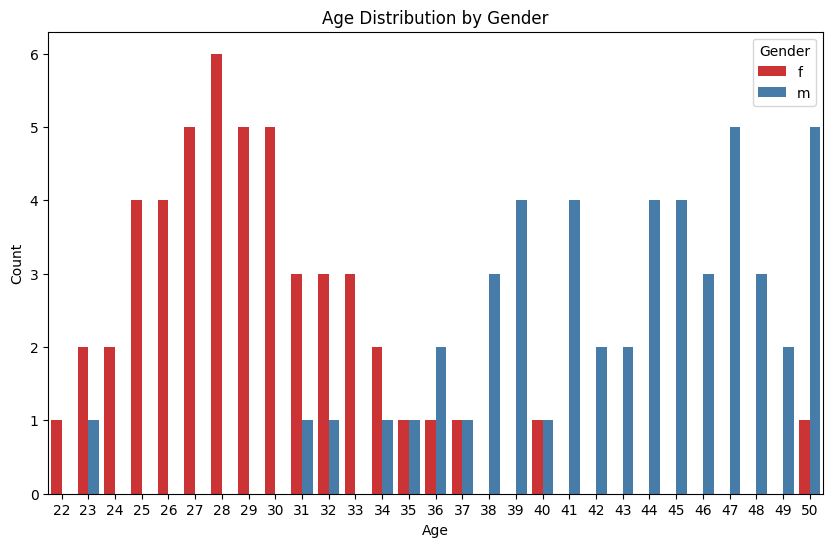

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Age', hue='Gender', palette='Set1')

# Set labels and title for the plot
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Gender')

# Show the plot
plt.show()


In Conclusion 

The correlation matrix indicates a strong relationship between Age and Sleep Quality. The diagonal values of 1.000000 signify perfect correlations, as each variable is perfectly correlated with itself. The off-diagonal value, -0.848356, reveals a strong negative correlation between Age and Sleep Quality. This suggests that as Age increases, Sleep Quality tends to decrease significantly, and vice versa. The negative correlation highlights an inverse relationship between these variables, meaning older individuals in the dataset are likely to experience lower sleep quality compared to younger individuals.The persons whose Wake-up Time is between 6.5 to 7.0 , they have good Sleep quality . The person who have high physical Activity they have high sleep Quality. The person who have less or low physical Activity they have low sleep Quality.